In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder 


In [3]:
df = pd.read_csv('C:\\Users\\nex20\\Downloads\\covid_toy.csv')

In [4]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [6]:
X = df.drop(columns = 'has_covid')
y = df['has_covid']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [10]:
X_train.head()

,age,gender,fever,cough,city
28,16,Male,104.0,Mild,Kolkata
93,27,Male,100.0,Mild,Kolkata
5,84,Female,NaN,Mild,Bangalore
66,51,Male,104.0,Mild,Kolkata
65,69,Female,102.0,Mild,Bangalore


In [11]:
y_train.head()

28     No
93    Yes
5     Yes
66     No
65     No
Name: has_covid, dtype: object

In [12]:
X_train.size

335

In [13]:
y_train.size

67

In [14]:
df['cough'].value_counts()

cough
Mild      62
Strong    38
Name: count, dtype: int64

C:\Users\nex20\AppData\Local\Temp\ipykernel_22452\2658143114.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df['cough'], palette=['#7AB', '#EDA'])


<Figure size 700x700 with 0 Axes>

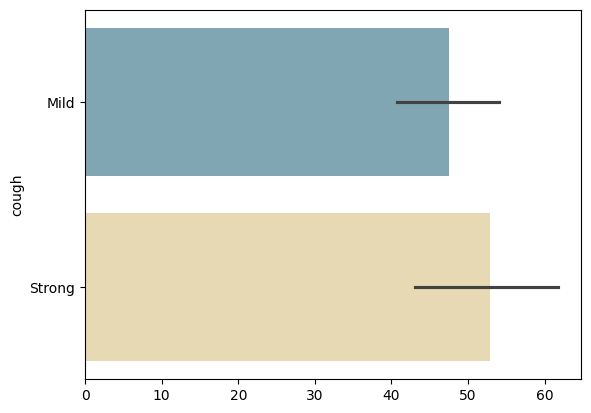

<Figure size 700x700 with 0 Axes>

In [29]:
sns.barplot(data=df['cough'], palette=['#7AB', '#EDA'])
plt.figure(figsize = (7,7))

In [30]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [32]:
df.dropna(subset = ['fever'] , inplace = True)

In [33]:
df.isnull().sum()

age          0
gender       0
fever        0
cough        0
city         0
has_covid    0
dtype: int64

# in normal i will choose each and apply encoder then use pd.concat buut with column transfromer it becomes easy 

In [34]:
from sklearn.compose import ColumnTransformer

In [46]:
transformer = ColumnTransformer(transformers = [
                                               ('tnf1' , SimpleImputer() , ['fever']),
                                               ('tnf2' , OrdinalEncoder(categories = [['Mild' , 'Strong']]) , ['cough'] ),
                                               ('tnf3' , OneHotEncoder(drop = 'first') , ['gender' , 'city'])
                                              ], remainder = 'passthrough') # or drop secOND option

In [61]:
transform_data = transformer.fit_transform(X_train)

In [62]:
transform_data.shape

(67, 7)

In [63]:
pd.DataFrame(transform_data)

,0,1,2,3,4,5,6
0,104.000000,0.0,1.0,0.0,1.0,0.0,16.0
1,100.000000,0.0,1.0,0.0,1.0,0.0,27.0
2,100.931034,0.0,0.0,0.0,0.0,0.0,84.0
3,104.000000,0.0,1.0,0.0,1.0,0.0,51.0
4,102.000000,0.0,0.0,0.0,0.0,0.0,69.0
...,...,...,...,...,...,...,...
62,102.000000,1.0,0.0,0.0,0.0,0.0,24.0
63,104.000000,1.0,0.0,1.0,0.0,0.0,75.0
64,104.000000,0.0,1.0,0.0,0.0,0.0,51.0
65,102.000000,1.0,0.0,0.0,1.0,0.0,82.0


In [64]:
transformer.transform(X_test)

array([[104.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  17.        ],
       [ 98.        ,   0.        ,   1.        ,   1.        ,
          0.        ,   0.        ,  83.        ],
       [101.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   0.        ,  68.        ],
       [ 99.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,  72.        ],
       [102.        ,   1.        ,   1.        ,   1.        ,
          0.        ,   0.        ,  20.        ],
       [103.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  50.        ],
       [ 98.        ,   1.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  71.        ],
       [ 99.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,  14.        ],
       [100.93103448,   0.        ,   0.        ,   1.        ,
          0.    

In [65]:
transformer.transform(X_test).shape

(33, 7)